<a id="TOP"> </a>
<div class="alert alert-box alert-info">
</div>

***

# EXPLORE

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wrangle import clean_zillow, summarize
from viz import get_viz

import warnings
warnings.filterwarnings("ignore")

In [2]:
get_viz()


from viz import boxplots, hists, heatmaps, slicer, haversine
        


In [3]:
from viz import boxplots, hists, heatmaps, slicer, haversine

In [4]:
df = clean_zillow()

Number of observations removed: 9964


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    41067 non-null  int64         
 1   parcel                41067 non-null  int64         
 2   logerror              41067 non-null  float64       
 3   trans_date            41067 non-null  datetime64[ns]
 4   bathrooms             41067 non-null  object        
 5   bedrooms              41067 non-null  object        
 6   calc_bath_n_bed       41067 non-null  float64       
 7   tot_sqft              41067 non-null  float64       
 8   fips                  41067 non-null  object        
 9   hot_tub               41067 non-null  float64       
 10  lat                   41067 non-null  float64       
 11  lon                   41067 non-null  float64       
 12  lot_sqft              41067 non-null  float64       
 13  pools           

In [6]:
df.land_tax_value.dtype

dtype('float64')

In [7]:
num_vars = []
for i in df:
    if df[i].dtype != 'O':
        num_vars.append(i)
num_vars

['id',
 'parcel',
 'logerror',
 'trans_date',
 'calc_bath_n_bed',
 'tot_sqft',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'raw_tract_and_block',
 'city_id',
 'zip_code',
 'num_rooms',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tract_and_block',
 'half_baths']

In [8]:
cat_vars = []
for i in df:
    if i not in num_vars:
        cat_vars.append(i)
cat_vars.append('trans_date')

cat_vars

['bathrooms', 'bedrooms', 'fips', 'county_landuse', 'year_built', 'trans_date']

In [13]:
num_vars.remove('trans_date')

In [15]:
df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   calc_bath_n_bed       41067 non-null  float64
 4   tot_sqft              41067 non-null  float64
 5   hot_tub               41067 non-null  float64
 6   lat                   41067 non-null  float64
 7   lon                   41067 non-null  float64
 8   lot_sqft              41067 non-null  float64
 9   pools                 41067 non-null  float64
 10  raw_tract_and_block   41067 non-null  float64
 11  city_id               41067 non-null  float64
 12  zip_code              41067 non-null  float64
 13  num_rooms             41067 non-null  float64
 14  building_tax_value    41067 non-null  float64
 15  tax_value          

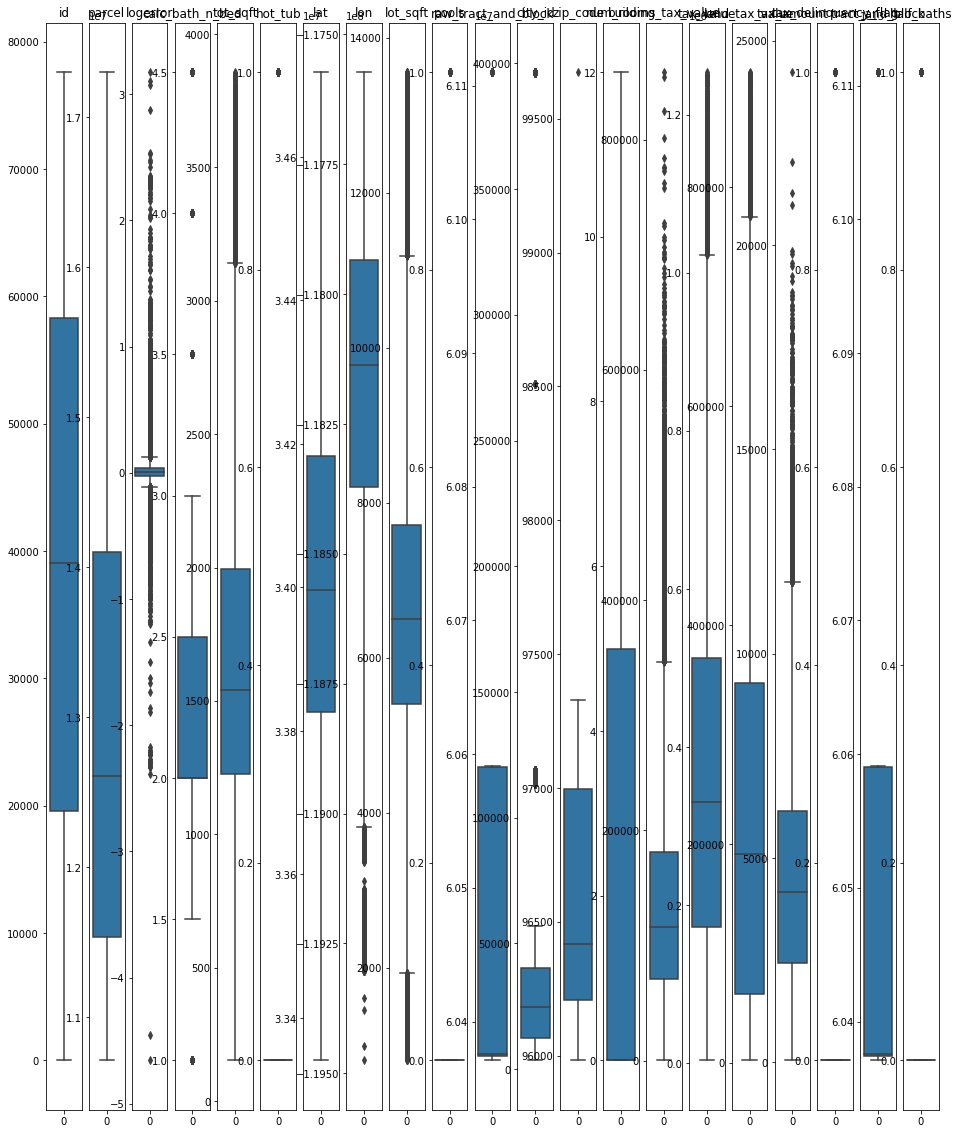

In [16]:
boxplots(df[num_vars])

In [17]:
summarize(df[num_vars])


    DataFrame .head():
    -----------------
|    |   id |      parcel |    logerror |   calc_bath_n_bed |   tot_sqft |   hot_tub |         lat |          lon |   lot_sqft |   pools |   raw_tract_and_block |   city_id |   zip_code |   num_rooms |   building_tax_value |        tax_value |   land_tax_value |   tax_amount |   tax_delinquency_flag |   tract_and_block |   half_baths |
|---:|-----:|------------:|------------:|------------------:|-----------:|----------:|------------:|-------------:|-----------:|--------:|----------------------:|----------:|-----------:|------------:|---------------------:|-----------------:|-----------------:|-------------:|-----------------------:|------------------:|-------------:|
|  0 |    0 | 1.42975e+07 |  0.0255949  |               3.5 |       3100 |         0 | 3.36349e+07 | -1.17869e+08 |       4506 |       0 |           6.05906e+07 |     53571 |      96978 |           0 |               485713 |      1.02328e+06 |           537569 |     11013.7  |                      0 |       6.05906e+13 |            1 |
|  1 |    1 | 1.70529e+07 |  0.0556191  |               1   |       1465 |         0 | 3.44493e+07 | -1.19282e+08 |      12647 |       0 |           6.111e+07   |     13091 |      97099 |           5 |                88000 | 464000           |           376000 |      5672.48 |                      0 |       6.111e+13   |            0 |
|  2 |    2 | 1.41862e+07 |  0.00538285 |               2   |       1243 |         0 | 3.38862e+07 | -1.17823e+08 |       8432 |       1 |           6.05902e+07 |     21412 |      97078 |           6 |                85289 | 564778           |           479489 |      6488.3  |                      0 |       6.05902e+13 |            0 |
|  3 |    3 | 1.21779e+07 | -0.10341    |               3   |       2376 |         0 | 3.42452e+07 | -1.18241e+08 |      13038 |       1 |           6.0373e+07  |    396551 |      96330 |           0 |               108918 | 145143           |            36225 |      1777.51 |                      0 |       6.0373e+13  |            0 |
|  4 |    7 | 1.20691e+07 |  0.101723   |               1   |        738 |         0 | 3.41492e+07 | -1.18239e+08 |       4214 |       0 |           6.0373e+07  |     45457 |      96325 |           0 |                18890 | 218552           |           199662 |      2366.08 |                      0 |       6.0373e+13  |            0 |
    
    DataFrame .info():
    -----------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   calc_bath_n_bed       41067 non-null  float64
 4   tot_sqft              41067 non-null  float64
 5   hot_tub               41067 non-null  float64
 6   lat                   41067 non-null  float64
 7   lon                   41067 non-null  float64
 8   lot_sqft              41067 non-null  float64
 9   pools                 41067 non-null  float64
 10  raw_tract_and_block   41067 non-null  float64
 11  city_id               41067 non-null  float64
 12  zip_code              41067 non-null  float64
 13  num_rooms             41067 non-null  float64
 14  building_tax_value    41067 non-null  float64
 15  tax_value          


    
    DataFrame .describe():
    -----------------
|                      |   count |             mean |              std |             min |              25% |              50% |              75% |              max |
|:---------------------|--------:|-----------------:|-----------------:|----------------:|-----------------:|-----------------:|-----------------:|-----------------:|
| id                   |   41067 |  38942.1         |  22360.7         |     0           |  19609.5         |  39044           |  58307           |  77612           |
| parcel               |   41067 |      1.29366e+07 |      1.69558e+06 |     1.07119e+07 |      1.15316e+07 |      1.26086e+07 |      1.40985e+07 |      1.72999e+07 |
| logerror             |   41067 |      0.0161926   |      0.163331    |    -4.65542     |     -0.024449    |      0.00564142  |      0.0361682   |      3.17569     |
| calc_bath_n_bed      |   41067 |      2.07496     |      0.732155    |     1           |      2           |      2           |      2.5         |      4.5         |
| tot_sqft             |   41067 |   1665.89        |    600.515       |   152           |   1227           |   1540           |   1993           |   3858           |
| hot_tub              |   41067 |      0.0193343   |      0.137699    |     0           |      0           |      0           |      0           |      1           |
| lat                  |   41067 |      3.40167e+07 | 269551           |     3.33409e+07 |      3.38269e+07 |      3.39966e+07 |      3.41838e+07 |      3.47184e+07 |
| lon                  |   41067 |     -1.18182e+08 | 346167           |    -1.19475e+08 |     -1.18371e+08 |     -1.18137e+08 |     -1.17935e+08 |     -1.17572e+08 |
| lot_sqft             |   41067 |   6674.77        |   2184.96        |   804           |   5400           |   6500           |   7714           |  13555           |
| pools                |   41067 |      0.160567    |      0.367135    |     0           |      0           |      0           |      0           |      1           |
| raw_tract_and_block  |   41067 |      6.04905e+07 | 203415           |     6.0371e+07  |      6.0374e+07  |      6.03758e+07 |      6.05904e+07 |      6.11101e+07 |
| city_id              |   41067 |  34440.2         |  52151.5         |  3491           |  12447           |  24812           |  40227           | 396556           |
| zip_code             |   41067 |  96566.1         |    420.85        | 95982           |  96206           |  96415           |  96996           |  99675           |
| num_rooms            |   41067 |      1.87888     |      3.06518     |     0           |      0           |      0           |      5           |     12           |
| building_tax_value   |   41067 | 138982           |  97007           |   302           |  70552           | 115758           | 181000           | 858693           |
| tax_value            |   41067 | 369482           | 248173           |  3254           | 171558           | 330461           | 512072           |      1.25422e+06 |
| land_tax_value       |   41067 | 230500           | 189730           |  2250           |  62561           | 190732           | 346802           | 905416           |
| tax_amount           |   41067 |   4603.06        |   2890.74        |    49.18        |   2424.73        |   4175.14        |   6154.77        |  24234.6         |
| tax_delinquency_flag |   41067 |      0.0395451   |      0.19489     |     0           |      0           |      0           |      0           |      1           |
| tract_and_block      |   41067 |      6.04905e+13 |      2.03412e+11 |     6.0371e+13  |      6.0374e+13  |      6.03758e+13 |      6.05904e+13 |      6.11101e+13 |
| half_baths           |   41067 |      0.11323     |      0.316877    |     0           |      0           |      0           |      0           |      1           |
    
    Null Value Assessments:
    -----------------
        
        Nulls By Column:
| num_rows_missing   | percent_missing   |
|--------------------|-------------------|
    -----------------
        
        Nulls By Row:
|    |   num_cols_missing |   percent_missing |   count |
|---:|-------------------:|------------------:|--------:|
|  0 |                  0 |                 0 |   41067 |
    
    DataFrame .value_counts():
    -----------------
    
    

Column Name:  id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   id |
|:-------------------|-----:|
| (-77.613, 7761.2]  | 4083 |
| (7761.2, 15522.4]  | 4026 |
| (15522.4, 23283.6] | 4085 |
| (23283.6, 31044.8] | 4119 |
| (31044.8, 38806.0] | 4085 |
| (38806.0, 46567.2] | 4156 |
| (46567.2, 54328.4] | 4160 |
| (54328.4, 62089.6] | 4101 |
| (62089.6, 69850.8] | 4125 |
| (69850.8, 77612.0] | 4127 |



-------------
Column Name:  parcel 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                            |   parcel |
|:---------------------------|---------:|
| (10705266.964, 11370658.5] |     8809 |
| (11370658.5, 12029462.0]   |     5023 |
| (12029462.0, 12688265.5]   |     7549 |
| (12688265.5, 13347069.0]   |     5337 |
| (13347069.0, 14005872.5]   |     2552 |
| (14005872.5, 14664676.0]   |     8589 |
| (14664676.0, 15323479.5]   |        9 |
| (15323479.5, 15982283.0]   |        0 |
| (15982283.0, 16641086.5]   |        0 |
| (16641086.5, 17299890.0]   |     3199 |



-------------
Column Name:  logerror 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                              |   logerror |
|:-----------------------------|-----------:|
| (-4.664000000000001, -3.872] |          2 |
| (-3.872, -3.089]             |          0 |
| (-3.089, -2.306]             |          5 |
| (-2.306, -1.523]             |         17 |
| (-1.523, -0.74]              |         59 |
| (-0.74, 0.0432]              |      32100 |
| (0.0432, 0.826]              |       8710 |
| (0.826, 1.609]               |        105 |
| (1.609, 2.393]               |         60 |
| (2.393, 3.176]               |          9 |



-------------
Column Name:  calc_bath_n_bed 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   calc_bath_n_bed |
|:--------------|------------------:|
| (0.995, 1.35] |              8471 |
| (1.35, 1.7]   |               740 |
| (1.7, 2.05]   |             19529 |
| (2.05, 2.4]   |                 0 |
| (2.4, 2.75]   |              3319 |
| (2.75, 3.1]   |              7606 |
| (3.1, 3.45]   |                 0 |
| (3.45, 3.8]   |               439 |
| (3.8, 4.15]   |               824 |
| (4.15, 4.5]   |               139 |



-------------
Column Name:  tot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   tot_sqft |
|:-----------------|-----------:|
| (148.293, 522.6] |         18 |
| (522.6, 893.2]   |       2015 |
| (893.2, 1263.8]  |       9628 |
| (1263.8, 1634.4] |      11608 |
| (1634.4, 2005.0] |       7739 |
| (2005.0, 2375.6] |       4626 |
| (2375.6, 2746.2] |       2782 |
| (2746.2, 3116.8] |       1507 |
| (3116.8, 3487.4] |        814 |
| (3487.4, 3858.0] |        330 |



-------------
Column Name:  hot_tub 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   hot_tub |
|:--------------|----------:|
| (-0.002, 0.1] |     40273 |
| (0.1, 0.2]    |         0 |
| (0.2, 0.3]    |         0 |
| (0.3, 0.4]    |         0 |
| (0.4, 0.5]    |         0 |
| (0.5, 0.6]    |         0 |
| (0.6, 0.7]    |         0 |
| (0.7, 0.8]    |         0 |
| (0.8, 0.9]    |         0 |
| (0.9, 1.0]    |       794 |



-------------
Column Name:  lat 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                  |   lat |
|:---------------------------------|------:|
| (33339473.494000003, 33478601.5] |   436 |
| (33478601.5, 33616352.0]         |  1783 |
| (33616352.0, 33754102.5]         |  4046 |
| (33754102.5, 33891853.0]         |  8417 |
| (33891853.0, 34029603.5]         |  7333 |
| (34029603.5, 34167354.0]         |  7497 |
| (34167354.0, 34305104.5]         |  7512 |
| (34305104.5, 34442855.0]         |   830 |
| (34442855.0, 34580605.5]         |  1243 |
| (34580605.5, 34718356.0]         |  1970 |



-------------
Column Name:  lon 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                |   lon |
|:-------------------------------|------:|
| (-119477167.928, -119284972.3] |   101 |
| (-119284972.3, -119094679.6]   |  1076 |
| (-119094679.6, -118904386.9]   |   716 |
| (-118904386.9, -118714094.2]   |  1151 |
| (-118714094.2, -118523801.5]   |  2441 |
| (-118523801.5, -118333508.8]   |  6333 |
| (-118333508.8, -118143216.1]   |  8335 |
| (-118143216.1, -117952923.4]   |  9800 |
| (-117952923.4, -117762630.7]   |  7291 |
| (-117762630.7, -117572338.0]   |  3823 |



-------------
Column Name:  lot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   lot_sqft |
|:-------------------|-----------:|
| (791.248, 2079.1]  |        900 |
| (2079.1, 3354.2]   |       1727 |
| (3354.2, 4629.3]   |       2602 |
| (4629.3, 5904.4]   |       8535 |
| (5904.4, 7179.5]   |      12447 |
| (7179.5, 8454.6]   |       7959 |
| (8454.6, 9729.7]   |       3050 |
| (9729.7, 11004.8]  |       1974 |
| (11004.8, 12279.9] |       1192 |
| (12279.9, 13555.0] |        681 |



-------------
Column Name:  pools 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   pools |
|:--------------|--------:|
| (-0.002, 0.1] |   34473 |
| (0.1, 0.2]    |       0 |
| (0.2, 0.3]    |       0 |
| (0.3, 0.4]    |       0 |
| (0.4, 0.5]    |       0 |
| (0.5, 0.6]    |       0 |
| (0.6, 0.7]    |       0 |
| (0.7, 0.8]    |       0 |
| (0.8, 0.9]    |       0 |
| (0.9, 1.0]    |    6594 |



-------------
Column Name:  raw_tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                    |   raw_tract_and_block |
|:-----------------------------------|----------------------:|
| (60370272.019999996, 60444919.091] |                 26718 |
| (60444919.091, 60518827.081]       |                     0 |
| (60518827.081, 60592735.071]       |                 11150 |
| (60592735.071, 60666643.061]       |                     0 |
| (60666643.061, 60740551.051]       |                     0 |
| (60740551.051, 60814459.041]       |                     0 |
| (60814459.041, 60888367.031]       |                     0 |
| (60888367.031, 60962275.021]       |                     0 |
| (60962275.021, 61036183.011]       |                     0 |
| (61036183.011, 61110091.001]       |                  3199 |



-------------
Column Name:  city_id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   city_id |
|:------------------------------|----------:|
| (3097.9339999999997, 42797.5] |     31141 |
| (42797.5, 82104.0]            |      8413 |
| (82104.0, 121410.5]           |       784 |
| (121410.5, 160717.0]          |         0 |
| (160717.0, 200023.5]          |         0 |
| (200023.5, 239330.0]          |         0 |
| (239330.0, 278636.5]          |        15 |
| (278636.5, 317943.0]          |         0 |
| (317943.0, 357249.5]          |         0 |
| (357249.5, 396556.0]          |       714 |



-------------
Column Name:  zip_code 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   zip_code |
|:---------------------|-----------:|
| (95978.306, 96351.3] |      16494 |
| (96351.3, 96720.6]   |       9311 |
| (96720.6, 97089.9]   |      10651 |
| (97089.9, 97459.2]   |       4610 |
| (97459.2, 97828.5]   |          0 |
| (97828.5, 98197.8]   |          0 |
| (98197.8, 98567.1]   |          0 |
| (98567.1, 98936.4]   |          0 |
| (98936.4, 99305.7]   |          0 |
| (99305.7, 99675.0]   |          1 |



-------------
Column Name:  num_rooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                              |   num_rooms |
|:-----------------------------|------------:|
| (-0.013000000000000001, 1.2] |       29447 |
| (1.2, 2.4]                   |           7 |
| (2.4, 3.6]                   |           9 |
| (3.6, 4.8]                   |         360 |
| (4.8, 6.0]                   |        5259 |
| (6.0, 7.2]                   |        3053 |
| (7.2, 8.4]                   |        2095 |
| (8.4, 9.6]                   |         719 |
| (9.6, 10.8]                  |         106 |
| (10.8, 12.0]                 |          12 |



-------------
Column Name:  building_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   building_tax_value |
|:------------------------------|---------------------:|
| (-556.3919999999999, 86141.1] |                13931 |
| (86141.1, 171980.2]           |                15739 |
| (171980.2, 257819.3]          |                 7006 |
| (257819.3, 343658.4]          |                 2555 |
| (343658.4, 429497.5]          |                 1123 |
| (429497.5, 515336.6]          |                  460 |
| (515336.6, 601175.7]          |                  175 |
| (601175.7, 687014.8]          |                   57 |
| (687014.8, 772853.9]          |                   13 |
| (772853.9, 858693.0]          |                    8 |



-------------
Column Name:  tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                        |   tax_value |
|:-----------------------|------------:|
| (2003.034, 128350.5]   |        7718 |
| (128350.5, 253447.0]   |        7797 |
| (253447.0, 378543.5]   |        8040 |
| (378543.5, 503640.0]   |        6904 |
| (503640.0, 628736.5]   |        4395 |
| (628736.5, 753833.0]   |        2747 |
| (753833.0, 878929.5]   |        1659 |
| (878929.5, 1004026.0]  |         963 |
| (1004026.0, 1129122.5] |         567 |
| (1129122.5, 1254219.0] |         277 |



-------------
Column Name:  land_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   land_tax_value |
|:---------------------|-----------------:|
| (1346.833, 92566.6]  |            12642 |
| (92566.6, 182883.2]  |             7299 |
| (182883.2, 273199.8] |             6507 |
| (273199.8, 363516.4] |             5243 |
| (363516.4, 453833.0] |             3829 |
| (453833.0, 544149.6] |             2489 |
| (544149.6, 634466.2] |             1467 |
| (634466.2, 724782.8] |              808 |
| (724782.8, 815099.4] |              494 |
| (815099.4, 905416.0] |              289 |



-------------
Column Name:  tax_amount 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                        |   tax_amount |
|:-----------------------|-------------:|
| (24.994, 2467.724]     |        10483 |
| (2467.724, 4886.268]   |        14167 |
| (4886.268, 7304.812]   |         9863 |
| (7304.812, 9723.356]   |         4022 |
| (9723.356, 12141.9]    |         1690 |
| (12141.9, 14560.444]   |          669 |
| (14560.444, 16978.988] |          121 |
| (16978.988, 19397.532] |           44 |
| (19397.532, 21816.076] |            6 |
| (21816.076, 24234.62]  |            2 |



-------------
Column Name:  tax_delinquency_flag 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   tax_delinquency_flag |
|:--------------|-----------------------:|
| (-0.002, 0.1] |                  39443 |
| (0.1, 0.2]    |                      0 |
| (0.2, 0.3]    |                      0 |
| (0.3, 0.4]    |                      0 |
| (0.4, 0.5]    |                      0 |
| (0.5, 0.6]    |                      0 |
| (0.6, 0.7]    |                      0 |
| (0.7, 0.8]    |                      0 |
| (0.8, 0.9]    |                      0 |
| (0.9, 1.0]    |                   1624 |



-------------
Column Name:  tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                        |   tract_and_block |
|:---------------------------------------|------------------:|
| (60370272021099.984, 60444919091001.7] |             26718 |
| (60444919091001.7, 60518827081003.4]   |                 0 |
| (60518827081003.4, 60592735071005.1]   |             11150 |
| (60592735071005.1, 60666643061006.8]   |                 0 |
| (60666643061006.8, 60740551051008.49]  |                 0 |
| (60740551051008.49, 60814459041010.2]  |                 0 |
| (60814459041010.2, 60888367031011.9]   |                 0 |
| (60888367031011.9, 60962275021013.6]   |                 0 |
| (60962275021013.6, 61036183011015.3]   |                 0 |
| (61036183011015.3, 61110091001017.0]   |              3199 |



-------------
Column Name:  half_baths 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   half_baths |
|:--------------|-------------:|
| (-0.002, 0.1] |        36417 |
| (0.1, 0.2]    |            0 |
| (0.2, 0.3]    |            0 |
| (0.3, 0.4]    |            0 |
| (0.4, 0.5]    |            0 |
| (0.5, 0.6]    |            0 |
| (0.6, 0.7]    |            0 |
| (0.7, 0.8]    |            0 |
| (0.8, 0.9]    |            0 |
| (0.9, 1.0]    |         4650 |



-------------
-----------------
---End of Line---


In [19]:
df.hot_tub.value_counts()

0.0    40273
1.0      794
Name: hot_tub, dtype: int64

In [20]:
df.calc_bath_n_bed.value_counts()

2.0    19529
1.0     8471
3.0     7606
2.5     3319
4.0      824
1.5      740
3.5      439
4.5      139
Name: calc_bath_n_bed, dtype: int64

## - Let's just drop calc_bath_n_bed

In [21]:
df.pools.value_counts()

0.0    34473
1.0     6594
Name: pools, dtype: int64

In [22]:
df.city_id.value_counts()

12447.0    8687
5534.0     1478
46298.0    1329
40227.0    1252
16764.0     962
           ... 
53162.0       1
34037.0       1
14906.0       1
10815.0       1
21395.0       1
Name: city_id, Length: 169, dtype: int64

## - There are 169 cities...

In [178]:
df.city_id = df.city_id.astype('int').astype('str')
df.zip_code = df.zip_code.astype('int').astype('str')

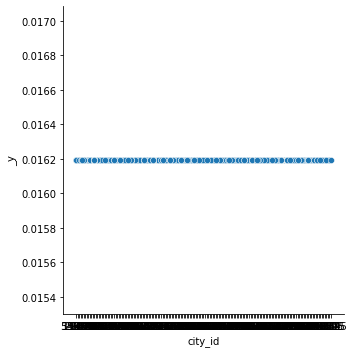

In [180]:
sns.relplot(x= df.city_id,
            y= df.logerror.mean()
           )
plt.show()

In [181]:
le_per_city = pd.DataFrame(columns=['city_id', 'le_mean', 'le_max', 'le_min'])
le_per_city

,city_id,le_mean,le_max,le_min


In [182]:
for i in df.city_id.unique():
    
    le_mean = df.logerror[df.city_id == i].mean()
    le_max = df.logerror[df.city_id == i].max()
    le_min = df.logerror[df.city_id == i].min()
    
    le_per_city.loc[len(le_per_city)] = [i, le_mean, le_max, le_min]

In [183]:
le_per_city

,city_id,le_mean,le_max,le_min
0,53571,0.024511,2.319867,-2.211811
1,13091,0.022556,0.792853,-0.172748
2,21412,0.017223,2.323423,-0.811628
3,396551,0.013081,0.534074,-0.143772
4,45457,0.010989,0.701859,-0.308737
...,...,...,...,...
164,31134,0.007559,0.082105,-0.066987
165,13311,-0.020170,0.115077,-0.287124
166,14906,-0.001180,-0.001180,-0.001180
167,10815,-0.015992,-0.015992,-0.015992


In [42]:
# logerror_per_city.city_id = logerror_per_city.city_id.astype('str')

In [184]:
le_per_city.city_id = le_per_city.city_id.astype('str')

In [185]:
px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_mean,
           title= 'The Mean Logerror for all Cities\nSeems to Fall within -.15 to .2 ish'
          )

In [186]:
px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_max,
           title= 'The Max Logerror for all Cities\nSeems to Fall within -.2 to 3.2 ish'
          )

In [187]:
px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_min,
           title= 'The Min Logerror for all Cities\nSeems to Fall within -.15 to .2 ish'
          )

In [188]:
sle_per_city = pd.DataFrame(columns=['city_id', 'sle_mean', 'sle_max', 'sle_min'])
sle_per_city

,city_id,sle_mean,sle_max,sle_min


In [189]:
for i in df.city_id.unique():
    
    squared_error = df.logerror[df.city_id == i]**2
#     print(squared_error)
    sle_mean = squared_error.mean()
#     print(sle_mean)
    sle_max = squared_error.max()
    sle_min = squared_error.min()
    
    sle_per_city.loc[len(sle_per_city)] = [i, sle_mean, sle_max, sle_min]

In [107]:
# sle_per_city.city_id = sle_per_city.city_id.astype('str')

In [190]:
sle_per_city

,city_id,sle_mean,sle_max,sle_min
0,53571,0.084877,5.381781,8.971940e-07
1,13091,0.013736,0.628616,2.072021e-09
2,21412,0.021215,5.398294,1.947949e-09
3,396551,0.009991,0.285235,4.138533e-07
4,45457,0.011511,0.492606,1.302513e-10
...,...,...,...,...
164,31134,0.005614,0.006741,4.487243e-03
165,13311,0.026218,0.082440,1.922091e-05
166,14906,0.000001,0.000001,1.392458e-06
167,10815,0.000256,0.000256,2.557431e-04


In [109]:
px.scatter(data_frame= sle_per_city,
           x= sle_per_city.city_id,
           y= sle_per_city.sle_mean,
           title= 'The Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
          )

In [191]:
px.scatter(data_frame= sle_per_city,
           x= sle_per_city.city_id,
           y= sle_per_city.sle_max,
           title= 'The Max Squared Logerror for all Cities\nSeems to Fall within 0 to 22 ish'
          )

In [111]:
px.scatter(data_frame= sle_per_city,
           x= sle_per_city.city_id,
           y= sle_per_city.sle_min,
           title= 'The Min Squared Logerror for most Cities\nSeems to Fall within 0 to .0015 ish'
          )

In [192]:
rsle_per_city = pd.DataFrame(columns=['city_id', 'rsle_mean', 'rsle_max', 'rsle_min'])
rsle_per_city

,city_id,rsle_mean,rsle_max,rsle_min


In [193]:
for i in df.city_id.unique():
    
    rsquared_error = df.logerror[df.city_id == i].abs()
#     print(squared_error)
    rsle_mean = rsquared_error.mean()
#     print(sle_mean)
    rsle_max = rsquared_error.max()
    rsle_min = rsquared_error.min()
    
    rsle_per_city.loc[len(rsle_per_city)] = [i, rsle_mean, rsle_max, rsle_min]

In [194]:
# rsle_per_city.city_id = rsle_per_city.city_id.astype('str')

In [195]:
rsle_per_city

,city_id,rsle_mean,rsle_max,rsle_min
0,53571,0.120237,2.319867,0.000947
1,13091,0.063421,0.792853,0.000046
2,21412,0.044348,2.323423,0.000044
3,396551,0.055495,0.534074,0.000643
4,45457,0.064970,0.701859,0.000011
...,...,...,...,...
164,31134,0.074546,0.082105,0.066987
165,13311,0.125584,0.287124,0.004384
166,14906,0.001180,0.001180,0.001180
167,10815,0.015992,0.015992,0.015992


In [196]:
px.scatter(data_frame= rsle_per_city,
           x= rsle_per_city.city_id,
           y= rsle_per_city.rsle_mean,
           title= 'The Root Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
          )

In [197]:
px.scatter(data_frame= rsle_per_city,
           x= rsle_per_city.city_id,
           y= rsle_per_city.rsle_max,
           title= 'The Max Root Squared Logerror for all Cities\nSeems to Fall within 0 to 4.6 ish'
          )

In [198]:
px.scatter(data_frame= rsle_per_city,
           x= rsle_per_city.city_id,
           y= rsle_per_city.rsle_min,
           title= 'The Min Root Squared Logerror for most Cities\nSeems to Fall within 0 to .15 ish'
          )

#  Let's look at zip_code in the same way

In [199]:
le_per_zip = pd.DataFrame(columns=['zip_code', 'le_mean', 'le_max', 'le_min'])
le_per_zip

,zip_code,le_mean,le_max,le_min


In [200]:
for i in df.zip_code.unique():
    
    le_mean = df.logerror[df.zip_code == i].mean()
    le_max = df.logerror[df.zip_code == i].max()
    le_min = df.logerror[df.zip_code == i].min()
    
    le_per_zip.loc[len(le_per_zip)] = [i, le_mean, le_max, le_min]

In [119]:
le_per_zip

,zip_code,le_mean,le_max,le_min
0,96978.0,0.035707,1.241767,-0.406620
1,97099.0,0.022556,0.792853,-0.172748
2,97078.0,0.014934,1.155001,-0.811628
3,96330.0,0.013946,0.697290,-0.229723
4,96325.0,0.026025,0.362212,-0.177795
...,...,...,...,...
370,96980.0,0.005684,0.033089,-0.039389
371,96956.0,0.051256,0.108155,0.003146
372,96148.0,0.067098,0.067098,0.067098
373,95996.0,-0.063314,0.063920,-0.190549


In [121]:
# le_per_zip.zip_code = le_per_zip.zip_code.astype('str')

In [201]:
px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_mean,
           labels= {'le_mean': '<b>Mean Log Error</b>'
                    ,'zip_code': '<b>Zip Codes</b>'
                   },
           title= 'The Mean Logerror for most Zip Codes \
Seems to Fall within <b>-.4</b> to <b>.4</b> ish <br><br>\
            With <b>97092</b> way negative at <b>-1.9</b>'
          )

In [202]:
px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_max,
           title= 'The Max Logerror for all Zip Codes\nSeems to Fall within -.2 to 3.2 ish'
          )

In [203]:
px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_min,
           title= 'The Min Logerror for all Cities\nSeems to Fall within -.15 to .2 ish'
          )

In [204]:
sle_per_zip = pd.DataFrame(columns=['zip_code', 'sle_mean', 'sle_max', 'sle_min'])
sle_per_zip

,zip_code,sle_mean,sle_max,sle_min


In [205]:
for i in df.zip_code.unique():
    
    squared_error = df.logerror[df.zip_code == i]**2
#     print(squared_error)
    sle_mean = squared_error.mean()
#     print(sle_mean)
    sle_max = squared_error.max()
    sle_min = squared_error.min()
    
    sle_per_zip.loc[len(sle_per_zip)] = [i, sle_mean, sle_max, sle_min]

In [127]:
# sle_per_zip.zip_code = sle_per_zip.zip_code.astype('str')

In [206]:
sle_per_zip

,zip_code,sle_mean,sle_max,sle_min
0,96978,0.058250,1.541985,9.091967e-07
1,97099,0.013736,0.628616,2.072021e-09
2,97078,0.011568,1.334027,1.947949e-09
3,96330,0.009902,0.486214,1.353134e-08
4,96325,0.010613,0.131198,7.628286e-08
...,...,...,...,...
370,96980,0.000802,0.001552,8.971940e-07
371,96956,0.004504,0.011697,9.897377e-06
372,96148,0.004502,0.004502,4.502197e-03
373,95996,0.020197,0.036309,4.085822e-03


In [207]:
px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_mean,
           title= 'The Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
          )

In [208]:
px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_max,
           title= 'The Max Squared Logerror for all Cities\nSeems to Fall within 0 to 22 ish'
          )

In [209]:
px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_min,
           title= 'The Min Squared Logerror for most Cities\nSeems to Fall within 0 to .0015 ish'
          )

In [301]:
rsle_per_zip = pd.DataFrame(columns=['zip_code', 'rsle_mean', 'rsle_max', 'rsle_min', 'county'])
rsle_per_zip

,zip_code,rsle_mean,rsle_max,rsle_min,county


In [302]:
for i in df.zip_code.unique():
    
    rsquared_error = df.logerror[df.zip_code == i].abs()
#     print(squared_error)
    rsle_mean = rsquared_error.mean()
#     print(sle_mean)
    rsle_max = rsquared_error.max()
    rsle_min = rsquared_error.min()
    county = df[['fips']][df.zip_code == i]
    county = county.reset_index()
#     print(county.fips[0])
    county = county.fips[0]
#     print(county)
    rsle_per_zip.loc[len(rsle_per_zip)] = [i, rsle_mean, rsle_max, rsle_min, county]

In [134]:
# rsle_per_zip.zip_code = rsle_per_zip.zip_code.astype('str')

In [303]:
rsle_per_zip

,zip_code,rsle_mean,rsle_max,rsle_min,county
0,96978,0.110511,1.241767,0.000954,Orange County
1,97099,0.063421,0.792853,0.000046,Ventura County
2,97078,0.043606,1.155001,0.000044,Orange County
3,96330,0.053095,0.697290,0.000116,Los Angeles County
4,96325,0.068218,0.362212,0.000276,Los Angeles County
...,...,...,...,...,...
370,96980,0.025349,0.039389,0.000947,Orange County
371,96956,0.051256,0.108155,0.003146,Orange County
372,96148,0.067098,0.067098,0.067098,Los Angeles County
373,95996,0.127235,0.190549,0.063920,Los Angeles County


In [307]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_mean,
           title= ('The Root Squared Mean Logerror for all Cities\
<br>Seems to Fall within 0 to .25 ish\nWith 97092 as the only Zip with RSMLE of 1.9!')
#            ,text= 'rsle_mean'
#            ,facet_col= 'county'
           ,
           
          )

In [308]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_max,
           labels= {'rsle_max': '<b>Max Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Max</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>4.6</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [248]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           labels= {'rsle_min': '<b>Min Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Minimum</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>1.9</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [246]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           title= 'The Min Root Squared Logerror for most Cities\nSeems to Fall within 0 to .42 ish'
#            ,log_y= True
          )
# plt.text(120, 1.8, 'Zip Code 97092 Seems to have the largest Min Logerror at 1.9!')


In [318]:
px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Los Angeles County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Los Angeles County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [319]:
px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Orange County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Orange County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [320]:
px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Ventura County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Ventura County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [148]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_mean,
           title= 'The Root Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
           , log_y=True
          )

In [216]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_max,
           title= 'The Max Root Squared Logerror for all Cities\nSeems to Fall within 0 to 4.6 ish'
           , log_y=True
          )

In [253]:
fig = px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           title= 'The Min Root Squared Logerror for most Cities\nSeems to Fall within 0 to .42 ish'
           ,log_y= True,
                 labels= {'rsle_min': '<b>Min Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Code</b>'}
          )
# plt.text(120, 1.8, 'Zip Code 97092 Seems to have the largest Min Logerror at 1.9!')
fig.update_layout(title= {'text': 'The <b>Minimum</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
With RSLE shown in Log Scale We See Differentiation Even With Such Tint Values',
                 'x': .5,
                 'y': .9,
                 'xanchor': 'center',
                 'yanchor': 'top'})

In [221]:
df[df.zip_code == '97092'].T

,3338
id,6372
parcel,17051023
logerror,-1.897475
trans_date,2017-01-30 00:00:00
bathrooms,_3_
bedrooms,_4_
calc_bath_n_bed,3.0
tot_sqft,1908.0
fips,Ventura County
hot_tub,0.0


# FINAL CELL
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>